# ENSF 310 Project #1

## Loading and Visualizing Data

In this project, you will create a visual graphic of data from a dataset of your choosing.  The dataset may be of any topic, however, it must meet the following criteria:
- Come from a trustworthy and verifiable public source.
- Be properly cited in your project.
- Contain at least two columns of data and consist of at least 500 rows.

With this data, you need to create a visual that summarizes the data and presents some insight.  Simply plotting the data is not sufficient - you must manipulate the data to derive additional information (a running average, a trendline, annotations, etc).  The visual must be easy to understand.

## Requirements
- You may use .py files, however, you should use an annotated Notebook to explain your workflow.
- Your final submission must be uploaded to git.
- Your final graphic should have at least two subplots / subfigures and have at least four different data series.  
- Plots should be well labeled and clear.
- You may use any online resource for inspiration, however, you must cite all sources used outside of the course notes and Think Python textbook.

# Project 1 START
- First import the necessary libraries for data manipulation
- Then want to import dataset.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

steamdata = pd.read_csv('lifetime_concurrent_users_steam.csv', header=0)
steamdata.head() 
#Data was not regularly collected at the start of dataset resulting in NaN values

,DateTime,Users,Flags,In-Game
0,2004-01-13 00:00:00,84998.0,NaN,NaN
1,2004-01-14 00:00:00,NaN,NaN,NaN
2,2004-01-15 00:00:00,NaN,NaN,NaN
3,2004-01-16 00:00:00,NaN,NaN,NaN
4,2004-01-17 00:00:00,NaN,NaN,NaN


## Subplot 1
- Change 'DateTime' column to a different format with pd.to_datetime
- Define the figure
- Plot initial data
- Add plot point to act as an annotation ontop of the data

C:\Users\liamj\AppData\Local\Temp/ipykernel_9840/1086646357.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.plot_date(steamdata['DateTime'], steamdata['In-Game'], color='grey', markersize=1, Linestyle='-', label='Active Users Playing Games')


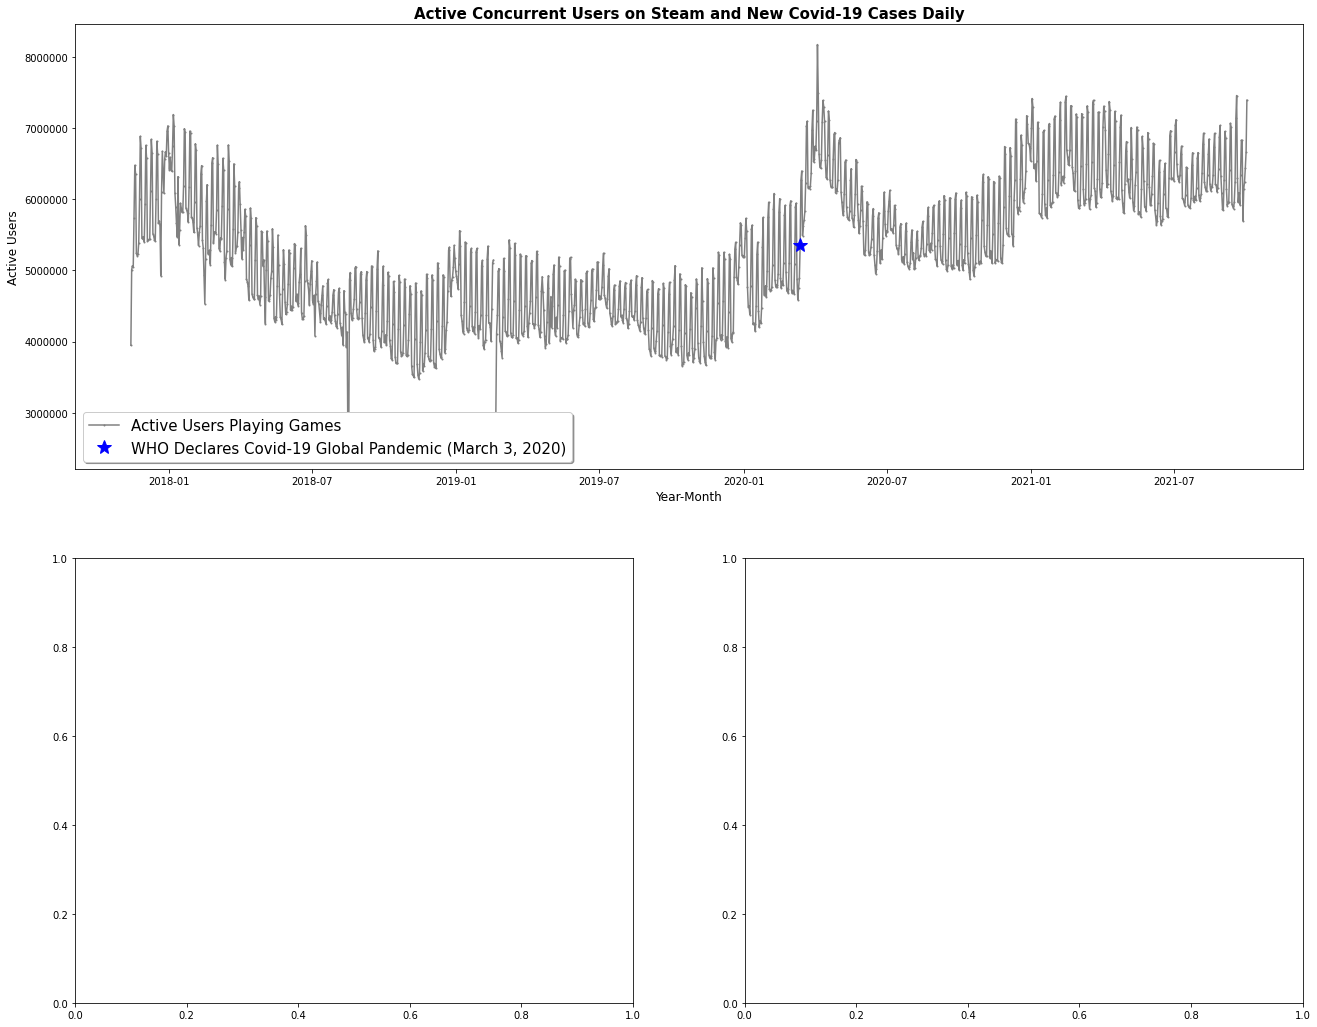

In [24]:
#ensure that the time columns of both sets of data are in correct format
steamdata['DateTime'] = pd.to_datetime(steamdata['DateTime'])

#define the figure for the graphs to go on and each subplot
fig = plt.figure(figsize=[22,18])
ax1 = plt.subplot(211)
ax2 = plt.subplot(223)
ax3 = plt.subplot(224)

#Plot 1
ax1.plot_date(steamdata['DateTime'], steamdata['In-Game'], color='grey', markersize=1, Linestyle='-', label='Active Users Playing Games')

#annotation where 5904 correlates to the date in the graphic
ax1.plot(steamdata['DateTime'].loc[5904], steamdata['In-Game'].loc[5904], '*b', markersize=15, label='WHO Declares Covid-19 Global Pandemic (March 3, 2020)')
#Adapted from Works Cited #8 'How to draw vertical lines on a given plot in Matplotlib'
#Plot 1 features
ax1.legend(loc='lower left', fancybox=True, framealpha=1, shadow=True, prop={'size':15})
#Based on Works Cited #3 'Customizing plot legends'
ax1.set_title('Active Concurrent Users on Steam and New Covid-19 Cases Daily', fontsize=15, fontweight='bold')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Active Users', fontsize=12)
ax1.ticklabel_format(style='plain', axis='y') #this is to remove scientific notation
#From Works Cited #2 'How to control scientific notation in Matplotlib'

## Next Plot 2
- Want it to be a scatter plot of total players during months 2020-2022 and a trendline plotted overtop of it
- Need to first separate DateTime and Users column and extract only 2020-2022
- After graph the users and time from the specified timeframe
- Figure out how to create a trendline

In [25]:
#First want to take only the time from 2020-2022 and users from 2020-2022
steamdata['2020-2022']= steamdata['DateTime'].loc[5834:6475]
steamdata['2020-2022-Users'] = steamdata['Users'].loc[5834:6475]
#From Works Cited #4 'Select Pandas dataframe rows between two dates'

#Plot the extracted data
ax2.plot(steamdata['2020-2022'], steamdata['2020-2022-Users'], 'or', markersize=2, label='Concurrent Users')

#to create trendline used 4 following lines of code
steamdata['2020-2022-Users'] = steamdata['2020-2022-Users'].fillna(0)#fill in empty cells in the users column with 0
#From Works Cited #5 'Pandas.dataframe.fillna'

c = steamdata['2020-2022'].apply(lambda x: x.value) #create variable that will regress the dateTime to values
#Based on Works Cited #7 'Pandas convert from date time to integer timestamp'
 
z = np.polyfit(c, steamdata['2020-2022-Users'].astype(np.int64), 12) #use numpy to find line of best fit
p = np.poly1d(z)
#From works cited #6 'how can I draw scatter trend line on matplot'

#Trendline plot
ax2.plot(steamdata['2020-2022'], p(c), '--k', label='Trendline of Concurrent Users', markersize=2)

#Plot 2 features
ax2.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, prop={'size':15})
ax2.ticklabel_format(style='plain', axis='y')
ax2.set_title('Total Concurrent Users on Steam from 2020-2022', fontsize=15, fontweight='bold')
ax2.set_xlabel('Year-Month', fontsize=12)
ax2.set_ylabel('Total Users', fontsize=12)

C:\Users\liamj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\liamj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(48.20000000000002, 0.5, 'Total Users')

## Final Plot 3
- Plotting the total users in grey and then ontop the two week rolling average
- Must create rolling average from users
- Plot both total and rolling over DateTime

In [26]:
#Plot 3 will be the rolling average of total users in grey and once the pandemic was announced graph overlapping to better show impact
#create two week rolling average of total users
steamdata['rolling_users'] = steamdata['Users'].rolling(14).mean()
ax3.plot(steamdata['DateTime'], steamdata['Users'], color='grey', label='Total Users')
ax3.plot(steamdata['DateTime'], steamdata['rolling_users'], color='orange', label='2 Week Rolling Average')

#Plot 3 features
ax3.ticklabel_format(style='plain', axis='y')
ax3.set_title('Total Users All Time', fontsize=15, fontweight='bold')
ax3.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, prop={'size':15})
ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Users Logged Into Steam', fontsize=12)

Text(717.7999999999998, 0.5, 'Users Logged Into Steam')

## Combine all plots together
These graphics show the active and inactive player base on the Steam network and exemplify the effects of the global pandemic on people playing video games.

C:\Users\liamj\AppData\Local\Temp/ipykernel_9840/1588724902.py:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.plot_date(steamdata['DateTime'], steamdata['In-Game'], color='grey', markersize=1, Linestyle='-', label='Active Users Playing Games')
C:\Users\liamj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\liamj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0, 0.5, 'Users Logged Into Steam')

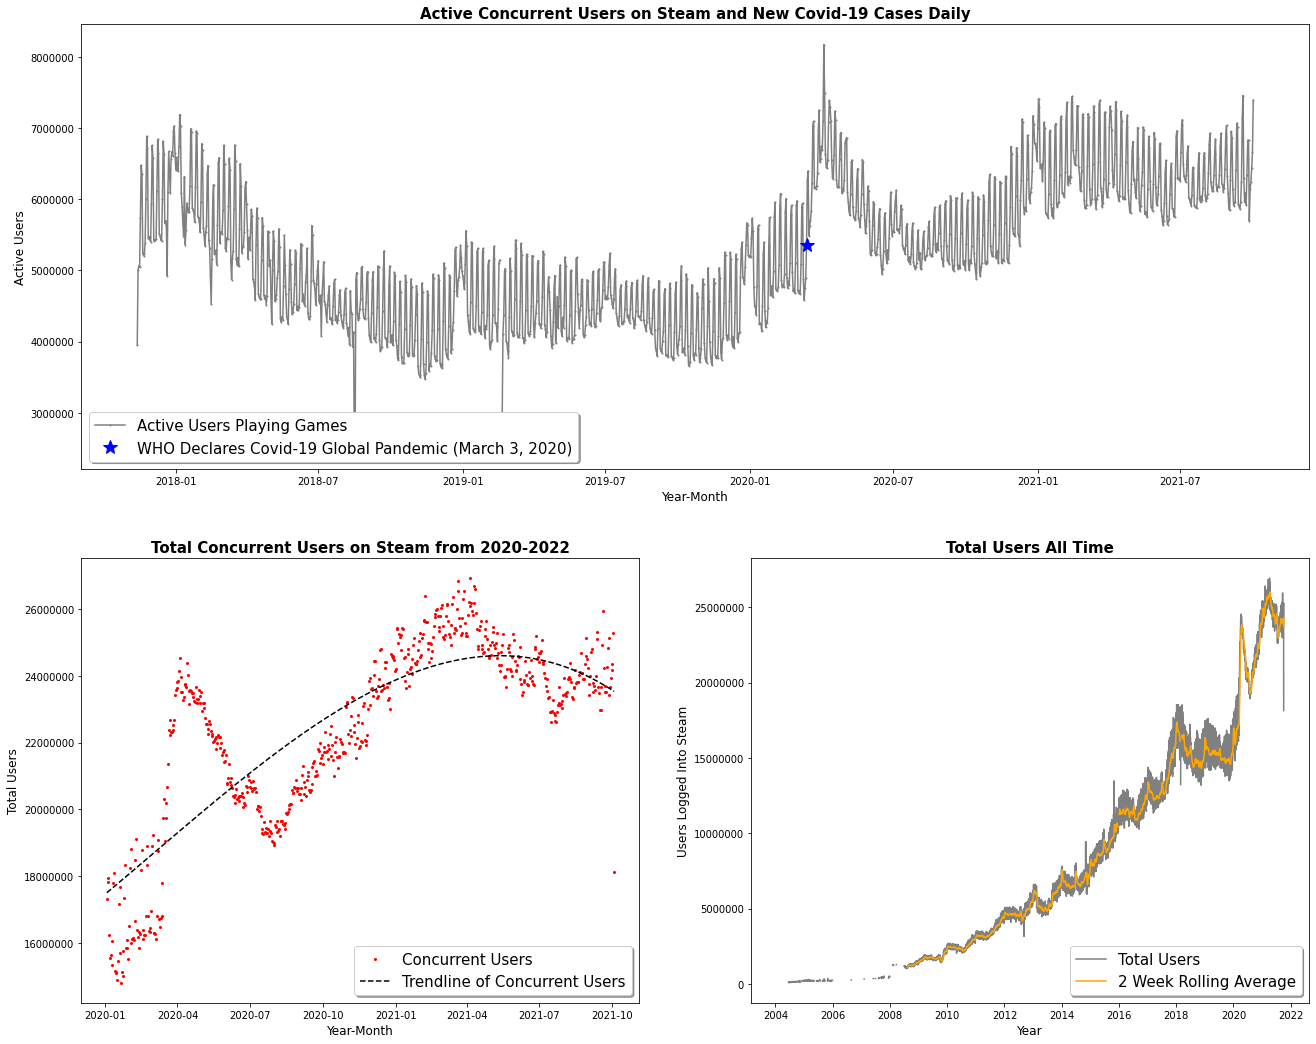

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

steamdata = pd.read_csv('lifetime_concurrent_users_steam.csv', header=0)
#Retrieved from Works Cited #1 'Steam charts and stats... steamdb'

#ensure that the time columns of both sets of data are in correct format
steamdata['DateTime'] = pd.to_datetime(steamdata['DateTime'])

#define the figure for the graphs to go on and each subplot
fig = plt.figure(figsize=[22,18])
ax1 = plt.subplot(211)
ax2 = plt.subplot(223)
ax3 = plt.subplot(224)

#Plot 1
ax1.plot_date(steamdata['DateTime'], steamdata['In-Game'], color='grey', markersize=1, Linestyle='-', label='Active Users Playing Games')

#annotation where 5904 correlates to the date in the graphic
ax1.plot(steamdata['DateTime'].loc[5904], steamdata['In-Game'].loc[5904], '*b', markersize=15, label='WHO Declares Covid-19 Global Pandemic (March 3, 2020)')
#Adapted from Works Cited #8 'How to draw vertical lines on a given plot in Matplotlib'
#Plot 1 features
ax1.legend(loc='lower left', fancybox=True, framealpha=1, shadow=True, prop={'size':15})
#Based on Works Cited #3 'Customizing plot legends'
ax1.set_title('Active Concurrent Users on Steam and New Covid-19 Cases Daily', fontsize=15, fontweight='bold')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Active Users', fontsize=12)
ax1.ticklabel_format(style='plain', axis='y') #this is to remove scientific notation
#From Works Cited #2 'How to control scientific notation in Matplotlib'

#Plot 2
#First want to take only the time from 2020-2022 and users from 2020-2022
steamdata['2020-2022']= steamdata['DateTime'].loc[5834:6475]
steamdata['2020-2022-Users'] = steamdata['Users'].loc[5834:6475]
#From Works Cited #4 'Select Pandas dataframe rows between two dates'

#Plot the extracted data
ax2.plot(steamdata['2020-2022'], steamdata['2020-2022-Users'], 'or', markersize=2, label='Concurrent Users')

#to create trendline
steamdata['2020-2022-Users'] = steamdata['2020-2022-Users'].fillna(0)#fill in empty cells in the users column with 0
#From Works Cited #5 'Pandas.dataframe.fillna'
c = steamdata['2020-2022'].apply(lambda x: x.value) #create variable that will regress the dateTime to values
#Based on Works Cited #7 'Pandas convert from date time to integer timestamp' 
z = np.polyfit(c, steamdata['2020-2022-Users'].astype(np.int64), 12) #use numpy to find line of best fit
p = np.poly1d(z)
#From works cited #6 'how can I draw scatter trend line on matplot'

#Trendline plot
ax2.plot(steamdata['2020-2022'], p(c), '--k', label='Trendline of Concurrent Users', markersize=2)

#Plot 2 features
ax2.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, prop={'size':15})
ax2.ticklabel_format(style='plain', axis='y')
ax2.set_title('Total Concurrent Users on Steam from 2020-2022', fontsize=15, fontweight='bold')
ax2.set_xlabel('Year-Month', fontsize=12)
ax2.set_ylabel('Total Users', fontsize=12)

#Plot 3
steamdata['rolling_users'] = steamdata['Users'].rolling(14).mean()
ax3.plot(steamdata['DateTime'], steamdata['Users'], color='grey', label='Total Users')
ax3.plot(steamdata['DateTime'], steamdata['rolling_users'], color='orange', label='2 Week Rolling Average')
#Plot 3 features
ax3.ticklabel_format(style='plain', axis='y')
ax3.set_title('Total Users All Time', fontsize=15, fontweight='bold')
ax3.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, prop={'size':15})
ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Users Logged Into Steam', fontsize=12)

## Works Cited:
1 - Steam charts and stats · Concurrent Steam Players · steamdb. (n.d.). Retrieved October 6, 2021, from (https://steamdb.info/graph/). 
<p>
2 - Aviss, avissaviss                    1, &amp; BENYBENY                    272k1818 gold badges129129 silver badges177177 bronze badges. (1966, February 1). How to control scientific notation in Matplotlib? Stack Overflow. Retrieved October 6, 2021, from (https://stackoverflow.com/questions/46735745/how-to-control-scientific-notation-in-matplotlib). 
<p>
3 - VanderPlas, J. (n.d.). Customizing plot legends. Customizing Plot Legends | Python Data Science Handbook. Retrieved October 6, 2021, from https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html. 
<p>
4 - Select Pandas dataframe rows between two dates: Data Interview questions. Select Pandas dataframe rows between two dates | Data Interview Questions. (n.d.). Retrieved October 6, 2021, from https://www.interviewqs.com/ddi-code-snippets/select-pandas-dataframe-rows-between-two-dates. 
<p>
5 - Pandas.dataframe.fillna¶. pandas.DataFrame.fillna - pandas 1.3.3 documentation. (n.d.). Retrieved October 6, 2021, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html. 
<p>
6 - zonozono                    7, Ashot MatevosyanAshot Matevosyan                    1, &amp; Scott BostonScott Boston                    123k1111 gold badges106106 silver badges142142 bronze badges. (1965, May 1). How can I draw scatter trend line on matplot? python-pandas. Stack Overflow. Retrieved October 6, 2021, from https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas. 
<p>
7 - Boi, F., Francesco BoiFrancesco Boi                    6, Always SunnyAlways Sunny                    30.8k66 gold badges4545 silver badges7676 bronze badges, Ignacio PeletierIgnacio Peletier                    1, ALollzALollz                    51.4k77 gold badges4545 silver badges6666 bronze badges, &amp; Jared MarksJared Marks                    75877 silver badges1212 bronze badges. (1967, May 1). Pandas convert from datetime to integer timestamp. Stack Overflow. Retrieved October 6, 2021, from https://stackoverflow.com/questions/54312802/pandas-convert-from-datetime-to-integer-timestamp. 
<p>
8 - FrancisFrancis                    4, GabrielGabriel                    8, Qina YanQina Yan                    1, seraloukseralouk                    24.4k55 gold badges8686 silver badges107107 bronze badges, Trenton McKinneyTrenton McKinney                    34.9k2121 gold badges6868 silver badges8787 bronze badges, PeterPeter                    9, &amp; SheldoreSheldore                    33.2k66 gold badges3838 silver badges5656 bronze badges. (1962, November 1). How to draw vertical lines on a given plot in Matplotlib. Stack Overflow. Retrieved October 6, 2021, from https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot-in-matplotlib. 